In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Create imbalanced dataset
X, y = make_classification(n_samples=1000,   # Total number of samples
                           n_features=10,    # Number of features
                           n_informative=5,  # Number of informative features
                           n_redundant=2,    # Number of redundant features
                           n_clusters_per_class=1,
                           weights=[0.95],   # Class imbalance: 95% of one class, 5% of the other
                           flip_y=0,         # No label noise
                           random_state=42)  # For reproducibility

# Convert to a pandas DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

# Check class distribution
class_distribution = df['target'].value_counts()

print("Class distribution:\n", class_distribution)
print("\nFirst few rows of the dataset:\n")
df.head()


Class distribution:
 target
0    950
1     50
Name: count, dtype: int64

First few rows of the dataset:



,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.393074,1.870399,-0.233284,-1.295438,-0.142837,1.475733,-0.969051,-0.093910,-1.110957,0.543093,0
1,1.398595,1.485975,1.206587,-0.024771,2.676278,-0.619636,-0.295027,0.982124,0.955856,2.159424,0
2,0.038501,1.106842,0.498605,-2.839004,-3.086502,0.753736,1.746154,1.452008,-2.833326,-0.514634,0
3,1.468521,1.004174,0.510276,-0.251417,3.146824,0.877351,-0.300327,-0.073444,0.356724,2.148308,0
4,2.932286,3.761785,0.777972,-2.891083,-1.699752,-0.170747,-3.071151,5.104681,-0.483350,0.404189,0


In [2]:
import seaborn as sns

<AxesSubplot: xlabel='feature_0', ylabel='feature_1'>

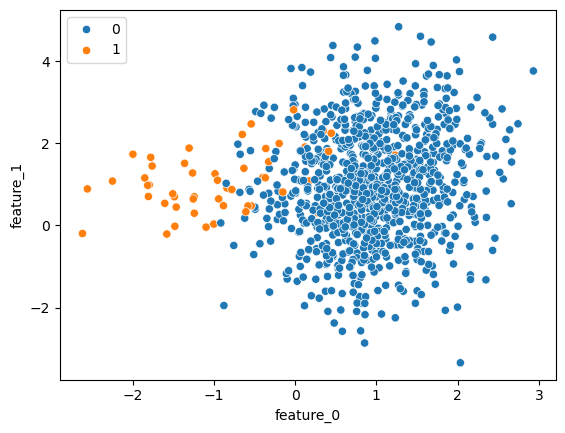

In [3]:
sns.scatterplot(x = 'feature_0', y='feature_1', data=df, hue=y)

# Under Sampling

Here we perform sampling in majority target and extract the the features equal to minority datapoints
#### e.g. Suppose I have 1000 datapoints with 1's count is 900 and 0's count 100 when we will perform Undersampling I'll get 1's 100 and 0's 100

In [4]:
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [6]:
# Apply RandomSampler
rs = RandomUnderSampler(random_state=42)
r_resampled, y_resampled = rs.fit_resample(X_train, y_train)

In [7]:
r_resampled

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
517,1.281030,0.620038,-0.585906,-0.954162,1.215173,-0.348764,0.620080,1.402226,-0.247510,1.450640
117,0.688149,3.211294,-1.189022,-4.010517,-5.939049,1.677790,-0.166838,4.280993,-2.909665,-1.632626
155,1.007089,-0.457595,0.577193,-0.959487,2.193215,-1.229018,0.133789,-0.546395,-1.036150,1.622050
400,1.414306,1.456350,-0.596603,-1.749095,-0.359768,-0.134065,0.495499,2.504474,-0.722543,0.870654
707,0.735561,1.449431,-1.250314,-1.095583,0.426457,0.210815,-1.111505,1.083614,-0.538186,1.195401
...,...,...,...,...,...,...,...,...,...,...
831,-1.776653,1.658564,1.644097,1.884444,-0.999422,-1.347787,-0.057828,1.477293,2.301908,0.338057
805,0.412461,1.804324,1.153894,-2.253530,1.310841,-0.860547,0.509028,0.864315,-2.060933,3.101540
413,-0.397456,1.170143,-0.514792,0.011547,1.645924,-0.003274,0.721278,-1.136652,-0.220593,1.667648
121,-1.479708,-0.020252,1.263854,1.399863,-1.117820,-1.009954,0.044802,1.208893,1.458674,-0.106467


In [8]:
y_resampled

517    0
117    0
155    0
400    0
707    0
      ..
831    1
805    1
413    1
121    1
71     1
Name: target, Length: 80, dtype: int64

<AxesSubplot: xlabel='feature_0', ylabel='feature_1'>

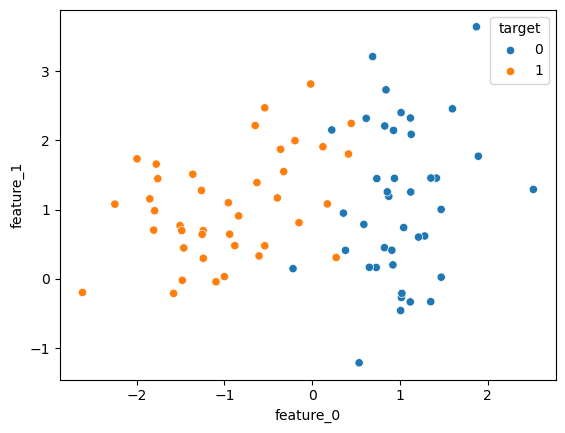

In [9]:
# Plot and see
sns.scatterplot(x='feature_0', y='feature_1', data=r_resampled, hue=y_resampled)

In [12]:
# Let's see the shape and count
print("Before applying the sampling the shape of X_train: ", X_train.shape)
print("After applying the sampling the shape of getting results: ", r_resampled.shape)
# Let's check on y_train
print(y_train.shape)
print(y_resampled.shape)
# See the values
print(y_resampled.value_counts())

Before applying the sampling the shape of X_train:  (800, 10)
After applying the sampling the shape of getting results:  (80, 10)
(800,)
(80,)
target
0    40
1    40
Name: count, dtype: int64


### Advantages
1. Reduction in Bias: We focus on same class's value 
2. Faster Training: We reduce our dataset so training will be faster
### Disadvantages
1. Information loss leading to Underfitting
2. Sampling Bias: May be during the sampling one type of data completely ignored by RandomSampling Technique

# Over Sampling

Here we apply this technique in miniority class and we try to increase our minority class's value by duplicating them

<AxesSubplot: xlabel='feature_0', ylabel='feature_1'>

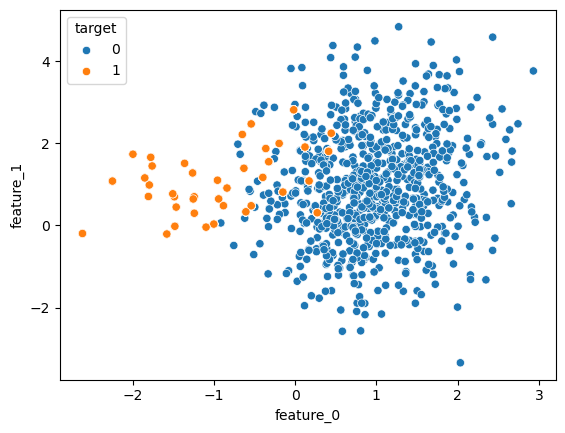

In [14]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
r_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)
# Plot and see
sns.scatterplot(x='feature_0', y='feature_1', data=r_oversampled, hue=y_oversampled)

In [16]:
"""Note Here You Can See and feel still minority class value  is less but it not true. Actually point is hiding behind 
the same point coz we duplicate it """

'Note Here You Can See and feel still minority class value  is less but it not true. Actually point is hiding behind \nthe same point coz we duplicate it '

In [23]:
# Let's Count the value and see
print(y_train.value_counts())
print()
print(y_oversampled.value_counts())
print()
print(X_train.shape)

target
0    760
1     40
Name: count, dtype: int64

target
0    760
1    760
Name: count, dtype: int64

(800, 10)


### Advantages
1. Reduction in Bias: We focus on same class's value
   
### Disadvantages

1. Size Increased
2. We creating more data through duplication. So my ml model may give more importance to duplicate points. So this leads us to Overfitting

# SMOTE (Synthetic Minority Oversampling Technique)

* This is also a Oversampling Technique just Random Oversamping but here we not blindly duplicate our datapoints.
* Here we try to create a new datapoints by using Interpolation technique
* We generate new datapoints between the two minority value

## Steps to calculate SMOTE

* <b>Train a KNN Model on Minority datapoints with 5 neighbors value - find each observation's 5 closet neighbors<b>
   
### To create a new synthetic data
1. Select a example from the minority class at random
2. Select neighbor of each example at random (for the interpolation)
3. Extract a random number between 0 to 1
4. Calculate the new examples as <b><i> Orignial Sample - Factor * (Original Sample - Neighbor) </i></b>
5. The final dataset consists of the original dataset + the newly created examples
* <b><i>Note: </i></b> Factor is what we selected randomly and it's value between 0 to 1

<AxesSubplot: xlabel='feature_0', ylabel='feature_1'>

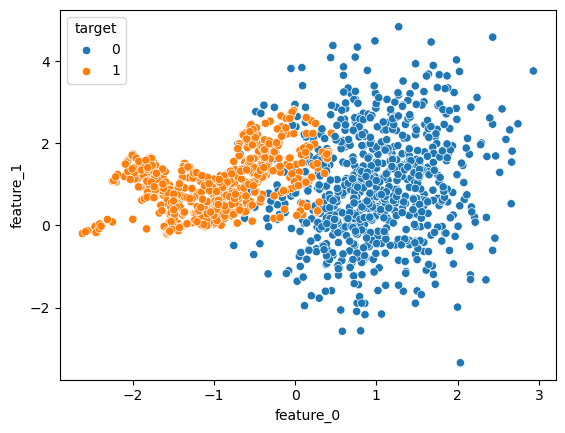

In [24]:
# Import & Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
smote_resampled, smoteY_resampled = smote.fit_resample(X_train, y_train)
# Plotting the scatterplot
sns.scatterplot(x='feature_0', y='feature_1', data=smote_resampled, hue=smoteY_resampled)

### Disadvantages
* Does not handle categorical data well
* Computational Complexity
* Dependency on the choice of neighbors
* Sensitive to outliers
* Balanced achieve may not reflect True Nature

# Ensemble Methods

* Suppose I have dataset with 1200 rows and in which 900 rows belong to 1 300 belong t0 0's
* now we train a model on Balanced Random Forest and here I'll be getting 300 1's and 30s 0's
* we will do it for mulitle model
* and will check.. most time what I'm getting will be my output 

In [33]:
from imblearn.ensemble import BalancedRandomForestClassifier
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
# Predict the set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:,1]
# Print classification Report
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
print(classification_report(y_test, y_pred_brf))
# Print ROC - AUC 
print("ROC-AUC Score: ", roc_auc_score(y_test, y_proba_brf))

/home/vipul/.local/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/vipul/.local/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/vipul/.local/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       190
           1       0.75      0.90      0.82        10

    accuracy                           0.98       200
   macro avg       0.87      0.94      0.90       200
weighted avg       0.98      0.98      0.98       200

ROC-AUC Score:  0.9813157894736843


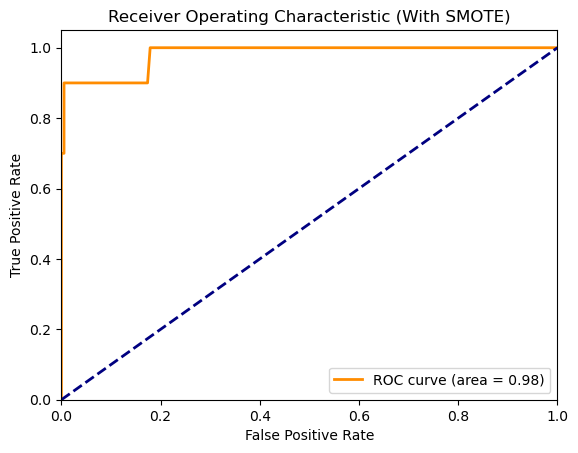

In [34]:
import matplotlib.pyplot as plt
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

In [36]:
# # Function to plot decision boundaries for SMOTE data
# def plot_decision_boundaries_smote(X, y, model):
#     plot_step = 0.02
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, alpha=0.3)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
#     plt.title("Decision Boundary (With SMOTE)")
#     plt.show()

# # Plot decision boundary for SMOTE data
# plot_decision_boundaries_smote(X_train, y_train, classifier)